# QCVV suite Examples

In [1]:
%load_ext autoreload
%autoreload 2

# Choose (or define) a backend

In [2]:
backend = "fakeadonis"
#backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"

#from iqm.qiskit_iqm.iqm_provider import IQMProvider
#iqm_url="https:"
#provider = IQMProvider(iqm_url)
#backend = provider.get_backend()

#### Set IQM Token if using Resonance.

In [ ]:
# import os
# os.environ["IQM_TOKEN"] = ""

# Clifford Randomized Benchmarking

NB: Clifford RB is executed by default with Interleaved RB !

In [ ]:
from iqm.benchmarks.randomized_benchmarking.clifford_rb.clifford_rb import *

In [ ]:
EXAMPLE_CRB = CliffordRBConfiguration(
    qubits_array=[[0,2]],#,[8,9],[13,14],[17,18],[5,6],[10,11],[15,16]],
    sequence_lengths=[2**(m+1)-1 for m in range(7)],
    num_circuit_samples=25,
    shots=2**8,
    calset_id=None,
    parallel_execution=False,
)

In [ ]:
benchmark_clifford_rb = CliffordRandomizedBenchmarking(backend, EXAMPLE_CRB)
run_clifford_rb = benchmark_clifford_rb.run()

In [ ]:
result_clifford_rb = benchmark_clifford_rb.analyze()

In [ ]:
for plot in result_clifford_rb.plots.values():
    display(plot)

# Interleaved Randomized Benchmarking

In [ ]:
from iqm.benchmarks.randomized_benchmarking.interleaved_rb.interleaved_rb import *
import numpy as np

In [ ]:
EXAMPLE_IRB_1Q = InterleavedRBConfiguration(
    qubits_array=[[0],[1],[2],[3],[4]],
    sequence_lengths=[2**(m+1)-1 for m in range(8)],
    num_circuit_samples=25,
    shots=2**9,
    calset_id=None,
    parallel_execution=False,
    interleaved_gate = "RGate",
    interleaved_gate_params = [np.pi, 0],
    simultaneous_fit = ["amplitude", "offset"],
)

In [ ]:
benchmark_irb_1Q = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_1Q)
run_irb_1Q = benchmark_irb_1Q.run()

In [ ]:
result_irb_1Q = benchmark_irb_1Q.analyze()

In [ ]:
result_irb_1Q.observations

In [ ]:
for v in result_irb_1Q.plots.values():
    display(v)

In [ ]:
EXAMPLE_IRB_2Q = InterleavedRBConfiguration(
    qubits_array=[[0,2],[1,2],[2,3],[2,4]],
    sequence_lengths=[2**(m+1)-1 for m in range(7)],
    num_circuit_samples=25,
    shots=2**8,
    calset_id=None,
    parallel_execution=False,
    interleaved_gate = "CZGate",
    interleaved_gate_params = None,
    simultaneous_fit = ["amplitude", "offset"],
)

In [ ]:
benchmark_irb_2Q = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_2Q)
run_irb_2Q = benchmark_irb_2Q.run()

In [ ]:
result_irb_2Q = benchmark_irb_2Q.analyze()

In [ ]:
for plot in result_irb_2Q.plots.values():
    display(plot)

In [ ]:
EXAMPLE_IRB_iswap = InterleavedRBConfiguration(
    qubits_array=[[0,2],[1,2]],
    sequence_lengths=[2**(m+1)-1 for m in range(7)],
    num_circuit_samples=30,
    shots=2**10,
    calset_id=None,
    parallel_execution=False,
    interleaved_gate = "iSwapGate",
    interleaved_gate_params = None,
    simultaneous_fit = ["amplitude", "offset"],
)

In [ ]:
benchmark_irb_iswap = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_iswap)
run_irb_iswap = benchmark_irb_iswap.run()

In [ ]:
result_irb_iswap = benchmark_irb_iswap.analyze()

In [ ]:
for plot in result_irb_iswap.plots.values():
    display(plot)

# Mirror Randomized Benchmarking

In [ ]:
from iqm.benchmarks.randomized_benchmarking.mirror_rb.mirror_rb import *

In [ ]:
EXAMPLE_MRB = MirrorRBConfiguration(
    qubits_array=[[0,2],
                  [0,1,2],
                  [0,1,2,3],
                  [0,1,2,3,4]],
                  #[0,1,3,4,8,9,13,14]],
                  # [0,1,3,4,8,9,13,14,17,18],
                  # [0,1,3,4,8,9,13,14,17,18,2,7],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10,6,11]],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10,6,11,15,16],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10,6,11,15,16,12,19]],
    depths_array=[[2**m for m in range(9)],
                  [2**m for m in range(8)],
                  [2**m for m in range(7)],
                  [2**m for m in range(6)]],
                  # [2**(m+1)-1 for m in range(6)],
                  # [2**(m+1)-1 for m in range(6)],
                  # [2**(m+1)-1 for m in range(5)],
                  # [2**(m+1)-1 for m in range(5)],
                  # [2**(m+1)-1 for m in range(4)],
                  # [2**(m+1)-1 for m in range(4)]],
    num_circuit_samples=10,
    num_pauli_samples=5,
    shots=2**8,
    qiskit_optim_level=1,
    routing_method="sabre",
    two_qubit_gate_ensemble={"CZGate": 0.8, "iSwapGate": 0.2},
    density_2q_gates=0.25,
    calset_id=None,
)

In [ ]:
benchmark_mrb = MirrorRandomizedBenchmarking(backend, EXAMPLE_MRB)
run_mrb = benchmark_mrb.run()

In [ ]:
result_mrb = benchmark_mrb.analyze()

In [ ]:
result_mrb.plots

In [ ]:
key_mrb_plot = "all_qubit_layouts"
result_mrb.plot(key_mrb_plot)

# Quantum Volume

In [ ]:
from iqm.benchmarks.quantum_volume.quantum_volume import *

In [ ]:
EXAMPLE_QV = QuantumVolumeConfiguration(
    num_circuits=500,
    shots=2**8,
    calset_id=None,
    num_sigmas=2,
    choose_qubits_routine="custom",
    custom_qubits_array=[[0,1,2,3], [0,1,2,3,4]],#, [0,1,3,4,5]],
    qiskit_optim_level=3,
    optimize_sqg=True,
    max_gates_per_batch=60_000,
    rem=True,
    mit_shots=1_000,
)

In [ ]:
benchmark_qv = QuantumVolumeBenchmark(backend, EXAMPLE_QV)
run0_qv = benchmark_qv.run()

In [ ]:
result0_qv = benchmark_qv.analyze()

In [ ]:
#run1_qv = benchmark_qv.run()

In [ ]:
#result1_qv = benchmark.analyze(run_index=0)

In [ ]:
for v in result0_qv.plots.values():
    display(v)

# CLOPS

In [ ]:
from iqm.benchmarks.quantum_volume.clops import *

In [ ]:
EXAMPLE_CLOPS = CLOPSConfiguration(
    qubits=[0,1,2,3,4],
    num_circuits=100, # By definition set to 100
    num_updates=10, # By definition set to 10
    num_shots=100, # By definition set to 100
    calset_id=None,
    clops_h_bool=True,
    qiskit_optim_level=3,
    optimize_sqg=True,
    routing_method="sabre",
    physical_layout="fixed",
)

In [ ]:
benchmark_clops = CLOPSBenchmark(backend, EXAMPLE_CLOPS)
run_clops = benchmark_clops.run()

In [ ]:
result_clops = benchmark_clops.analyze()

In [ ]:
result_clops.plot_all()

# GHZ state fidelity

In [3]:
from iqm.benchmarks.entanglement.ghz import *

In [4]:
MINIMAL_GHZ = GHZConfiguration(
    state_generation_routine="tree",
            custom_qubits_array=[
                [0,2],
                [0,1,2],
                [0,1,2,4],
                [0,1,2,3,4],
            ],
    shots=1000,
    fidelity_routine="coherences", 
    rem=True,
    mit_shots=1000,
)

In [5]:
benchmark_ghz = GHZBenchmark(backend, MINIMAL_GHZ)
run_ghz = benchmark_ghz.run()

2024-12-13 09:15:29,155 - iqm.benchmarks.logging_config - INFO - Now generating a 2-qubit GHZ state on qubits [0, 2]
2024-12-13 09:15:29,155 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeAdonisBackend with optimization level 3, sabre routing method and SQG optimization all circuits
2024-12-13 09:15:30,526 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeAdonisBackend with optimization level 3, sabre routing method and SQG optimization all circuits
2024-12-13 09:15:30,598 - iqm.benchmarks.logging_config - INFO - Submitting batch with 7 circuits corresponding to qubits [0, 2]
2024-12-13 09:15:30,605 - iqm.benchmarks.logging_config - INFO - Now generating a 3-qubit GHZ state on qubits [0, 1, 2]
2024-12-13 09:15:30,708 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeAdonisBackend with optimization level 3, sabre routing method and SQG optimization all circuits
2024-12-13 09:15:30,725 - iqm.benchmarks.logging_config - 

4 calibration circuits ready to be executed!
6 calibration circuits ready to be executed!


C:\Users\RaphaelBrieger\Desktop\iqm-benchmarks\src\iqm\benchmarks\readout_mitigation.py:269: UserWarning: Suppressing INFO messages from M3IQM with logging.disable(sys.maxsize) - update if problematic!
  warnings.warn("Suppressing INFO messages from M3IQM with logging.disable(sys.maxsize) - update if problematic!")
C:\Users\RaphaelBrieger\Desktop\iqm-benchmarks\src\iqm\benchmarks\readout_mitigation.py:269: UserWarning: Suppressing INFO messages from M3IQM with logging.disable(sys.maxsize) - update if problematic!
  warnings.warn("Suppressing INFO messages from M3IQM with logging.disable(sys.maxsize) - update if problematic!")


8 calibration circuits ready to be executed!
10 calibration circuits ready to be executed!


In [6]:
result = benchmark_ghz.analyze()

fidelity: 0.8394381867826386 +/- None
fidelity_rem: 0.9215250759385054 +/- None


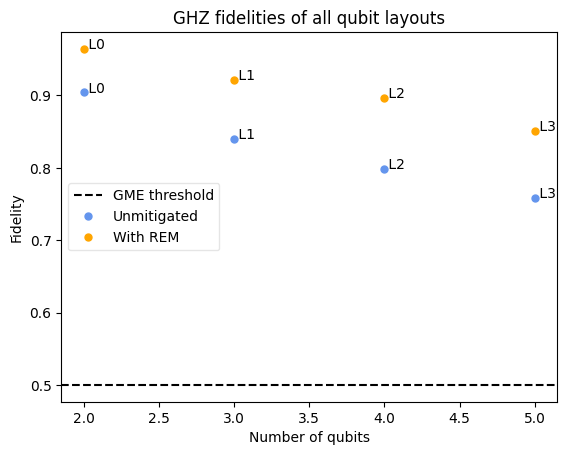

In [9]:
# Show observations for a specific qubit layout
qubit_layout = [0,1,2]
for observation in result.observations:
    if observation.identifier.string_identifier == str(qubit_layout):
        print(f"{observation.name}: {observation.value} +/- {observation.uncertainty}")
# Plot fidelities for all layouts
result.plot_all()

# QScore

*QScore currently works in a slightly different way to the other benchmarks, e.g., it uses* `run_experiment` *method instead of* `run`*; this will be changed in future releases.*

In [ ]:
from iqm.benchmarks.optimization.qscore import QScoreConfiguration
from iqm.benchmarks.benchmark_experiment import BenchmarkExperiment

In [ ]:
EXAMPLE_QSCORE = QScoreConfiguration(
    num_instances = 100,
    num_qaoa_layers= 1,
    shots = 20_000,
    calset_id=None, # calibration set ID, default is None
    min_num_nodes =  2,
    max_num_nodes = 5,
    use_virtual_node = True,
    use_classically_optimized_angles = True,
    choose_qubits_routine = "custom",
    custom_qubits_array=[[2],
                    [2, 0],
                    [2, 0, 1],
                    [2, 0, 1, 3],
                    [2, 0, 1, 3, 4]],
    seed = 1
    )

In [ ]:
benchmark = [EXAMPLE_QSCORE]

In [ ]:
EXAMPLE_EXPERIMENT = BenchmarkExperiment(backend, benchmark)
EXAMPLE_EXPERIMENT.run_experiment()